# Partecipanti al Gruppo:
Lorenzo Brizzi - S4865720

Lorenzo La Corte - S4784539

Davide Scarrà - S4798949

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import scipy
print (scipy.__version__)
from sklearn.linear_model import LinearRegression
import math

1.8.0


# Dataset Abalone


L'eta' di un abalone e' determinata tagliando il guscio attraverso il cono e contanto il numero di anelli presenti, usando un microscopio. 
Una procedura noiosa e time-consuming. 

Forse come data scientists, possiamo trovare altre caratteristiche piu' semplici da ottenere, che possano fornirci una stima dell'eta' dell'abalone in un modo piu' immediato. 

In [76]:
#codice qui 
abalone = pd.read_csv('abalone_converted.csv') 
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Estraiamo informazioni di base sul nostro dataset. Completiamo eventuali caratteristiche con dati mancanti.  

In [77]:
#codice qui
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


quanti dati e quante caratteristiche abbiamo a disposizione?

In [78]:
#codice qui
abalone.shape

(4177, 9)

Quale modello di machine learning possiamo utilizzare per stimare una funzione che preveda l'eta' (quale caratteristica la indica?) in funzione di uno o piu' degli altri descrittori a disposizione?

Dobbiamo determinare una relazione tra predittori e una variabile di risposta (che possiamo considerare continua). 

Possiamo quindi utilizzare un modello di **Regressione lineare**. 

Cominciamo considerando soltanto la caratteristica *Diameter*. 

Esercizio:

 * Usiamo una tecnica di visualizzazione opportuna per verificare se esiste una qualche relazione tra diametro e numero di anelli.



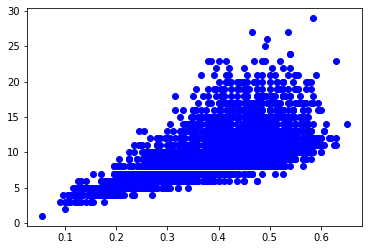

In [79]:
#codice qui 
plt.scatter(abalone['Diameter'],abalone['Rings'],color='b')

* Sembra che diametro ed eta' siano correlati. Verifichiamo con il calcolo del coefficiente di correlazione di Pearson 

In [80]:
#codice qui 
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## Modello di regressione lineare

Ok, ora implementiamo e alleniamo un modello di regressione lineare. 
Ricordate che dobbiamo dividere il dataset a disposizione in due diversi gruppi:

* **Training Set** -> porzione di dati che utilizziamo per il training del nostro modello (i parametri della retta) di regressione lineare;

* **Validation Set** -> porzione di dati che utilizziamo per valutare il nostro modello precedentemente allenato.

Non esiste un unico modo per dividere il dataset in training e test, normalmente, si utilizza un random split con una certa percentuale (per esempio 70/30 per training/test {rispetto ai 4k iniziali}).


Usiamo la libreria scikit-learn, lo schema che dovrete usare e' il seguente:

1. Definire le caratteristiche da usare;
2. Definire X e y; 
3. Dividere il dataset in training e test; 
4. Istanziare un oggetto della classe LinearRegression;
5. Allenare usando la funzione fit invocata sull'oggetto istanziato (passando il training set!);
6. Visualizzare i coefficienti imparati: useremo gli attributi *intercept_=* e *coef_* sull'oggetto ottenuto come output della funzione fit.

In scikit-learn esiste la funzione:

    X_train, X_valid, y_train, y_valid = train_test_split(X, y)

che effettua per noi lo splitting.

(1254, 1)
(2923, 1)
2.199231408935792
[18.90543913]


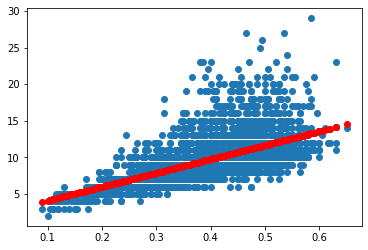

In [81]:
from sklearn.linear_model import LinearRegression

features = ['Diameter']

X= abalone[features]
y= abalone['Rings']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size= 0.7)

print(X_valid.shape)
print(X_train.shape)

regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

plt.scatter(X_train, y_train)
plt.scatter(X_train, regressor.coef_*X_train+regressor.intercept_, color='r')


Adesso possiamo usare il modello imparato, per effettuare predizioni sul validation set. E' sufficiente usare la funzione predict sull'oggetto restituito da fit, passando come argomento X_valid

In [82]:
y_pred = regressor.predict(X_valid)
y_pred.shape

(1254,)

sono tutti punti che giacciono sulla retta

## Stimare la Precisione della Funzione

Ora, come possiamo stimare la precisione della funzione che abbiamo imparato?

Sappiamo che non esiste una soluzione perfetta, ma possiamo trovare la soluzione migliore possibile, con i dati a disposizione. Per trovarla, useremo stime degli errori. 

Abbiamo visto che ci sono tre metriche per valutare i modelli a regressione di machine learning: 

* l’errore quadratico medio (MSE - Mean Squared Error); 
* lo scarto medio assoluto (MAE - Mean Absolute Error); 
* la radice dell’errore quadratico medio (RMSE - Root of Mean Squared Error).

ESERCIZIO: scrivete una funzione che implementi ciascuna delle tre metriche sopra descritte. 



In [83]:
def MSE (y_pred,y_true):
    return 1/y_pred.shape[0]*np.sum((y_pred-y_true)**2)
    
def MAE (y_pred,y_true):
    return 1/y_pred.shape[0]*np.sum(abs(y_pred-y_true))

def RMSE (y_pred,y_true):
    return math.sqrt(MSE(y_pred,y_true))


usate le tre funzioni appena definite, per calcolare le tre metriche sul modello di regressione lineare appena ottenuto, usando l'intero set di abalone. 

In [84]:
# calcolate le predizioni sul validation set (y_pred)

#MAE

print('MAE:', MAE(y_pred,y_valid))

#MSE
print('MSE:', MSE(y_pred,y_valid))


#replicate stampa per MSE e RMSE
print('RMSE:', RMSE(y_pred,y_valid))

MAE: 1.9285232347315222
MSE: 6.888347778440481
RMSE: 2.624566207669466


Possiamo anche direttamente utilizzare le implementazioni messe a dispozione da scikit-learn

In [85]:
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 1.9285232347315222
MSE: 6.888347778440481
RMSE: 2.624566207669466


Come faccio a sapere se questo risultato e' un buon risultato oppure no? 

Determiniamo il **modello nullo**.

il modello nullo rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso, e vedere l’efficacia del modello.

Nella regressione, possiamo sostituire tutti i valori della feature diametro con la media sull'intero dataset. 

In [86]:
#codice qui 

#calcolate il diametro medio
mean_rings = abalone['Rings'].mean()
#print(mean_rings)
# create la nuova x con lo stesso numero di campioni del dataset originale, e con tutti i valori uguali al valore medio del diametro appena calcolato
null_model_y = [mean_rings] * X_valid.shape[0]
#print(null_model_y)

# valutate il modello nullo usando le funzioni implementate 
print ('MAE:', metrics.mean_absolute_error(y_valid, null_model_y))
print ('MSE:', metrics.mean_squared_error(y_valid, null_model_y))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, null_model_y)))


MAE: 2.3328045012961156
MSE: 9.921268408884433
RMSE: 3.1498045032802326


## Facciamo lo stesso procedimento su tutte le features (al posto del diametro)

ESERCIZIO.

* Adesso, usate l'errore RMSE appena implementato per valutare quali features sono utili per predire l'eta', in modo da ottenere un modello quanto piu' preciso possibile. 

* Nel dettaglio, provate a considerare una una feature alla volta, ogni volta verificando l'utilita' della stessa, attraverso il calcolo del RMSE.

* Riguardate pero' il dataframe, escludereste qualche feature a priori? **no, sono tutti dimensioni e pesi e quindi presumiamo possano essere collegati con l'età**

* A questo punto, prendete tutte le features e replicate il tutto usandole insieme. Cosa succede al vostro modello? **ipotiziamo che tutto assieme dia una stima migliore**

In [87]:
#codice qui per una feature alla volta

for i in range(1, abalone.shape[1]-1):

    features = abalone.columns[i]
    X = abalone[[features]] #2 
    y = abalone['Rings'] #2

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7) #3
    # print(X_valid.shape)
    # print(X_train.shape)

    regressor = LinearRegression() #4

    regressor = regressor.fit(X_train, y_train) #5

    #print(regressor.intercept_)
    #print(regressor.coef_)
    
    y_pred = regressor.predict(X_valid)
               
    print ('RMSE', features, '\t\t - \t', np.sqrt(metrics.mean_squared_error(y_pred, y_valid)))

    
# A questo punto, prendete tutte le features e replicate il tutto usandole insieme.
features = np.asarray(list(abalone.columns))[1:-1] # sesso e età si saltano perché non han senso

X = abalone[features] #2 
y = abalone['Rings'] #2

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7) #3
# print(X_valid.shape)
# print(X_train.shape)

regressor = LinearRegression() #4

regressor = regressor.fit(X_train, y_train) #5

#print(regressor.intercept_)
#print(regressor.coef_)

y_pred = regressor.predict(X_valid)

print ('RMSE All Together \t\t - \t', np.sqrt(metrics.mean_squared_error(y_pred, y_valid)))


RMSE Length 		 - 	 2.5869216440083576
RMSE Diameter 		 - 	 2.5852323534285757
RMSE Height 		 - 	 2.993189378027595
RMSE Whole weight 		 - 	 2.6832428315947117
RMSE Shucked weight 		 - 	 2.962870368357641
RMSE Viscera weight 		 - 	 2.76973225604774
RMSE Shell weight 		 - 	 2.557034838302365
RMSE All Together 		 - 	 2.226411345619669


Sembra che il nostro errore diminusca aggiungendo tutti i descrittori. Quindi, effettivamente, tutti i descrittori assieme sono utili per predire l'eta' di un abalone. In seguito, verificheremo questa ipotesi valutando la correlazione tra queste features. 


Quindi, in generale, usando tutte le features a disposizione abbiamo un RMSE circa pari a due anelli. 



Vediamo ora se esiste correlazione tra le varie features del nostro dataset.

In [88]:
#codice qui 
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Il peso delle viscere sembra essere molto correlato alla lunghezza dell'abalone. 

## Modello di Regressione Lineare
### Stimare il Diametro a partire dal Peso delle Viscere

1. Provate ora a utilizzare un modello di regressione lineare per stimare proprio il diametro a partire dal peso delle viscere.
2. Calcolate anche il corrispondente errore.
3. Rappresentate la linea di best fit imparata e i dati in un grafico a dispersione
4. COMPITO A CASA: Definite un modello nullo per avere informazioni sull'errore in caso di random guess (seguite quanto fatto nell'esercizio precedente).  


### Modello di regressione lineare

0.260850385003219
[0.81814879]


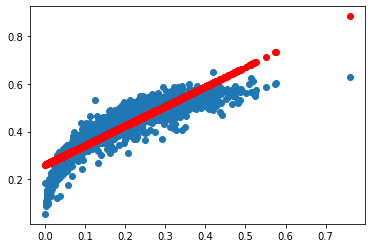

In [89]:
#codice qui 
features = ['Viscera weight'] #1

X = abalone[features] #2 
y = abalone['Diameter'] #2

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7) #3
# print(X_valid.shape)
# print(X_train.shape)

regressor = LinearRegression() #4

regressor = regressor.fit(X_train, y_train) #5

print(regressor.intercept_)
print(regressor.coef_)

plt.scatter(X_train, y_train)
plt.scatter(X_train, regressor.coef_*X_train + regressor.intercept_, color='r')    


Dal grafico ci risulta che le due misure sembrano correlate tra loro.

### Calcolo del corrispondente errore



In [90]:
y_pred = regressor.predict(X_valid)

print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

RMSE: 0.045476796153122216


### Modello Nullo
Il modello nullo rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso, e vedere l’efficacia del modello: possiamo costruire il nostro modello nullo sostituendo tutti i valori con la media sull'intero dataset.

In [91]:
#calcolate il diametro medio
mean_diameter = abalone['Diameter'].mean()

# create la nuova x con lo stesso numero di campioni del dataset originale, e con tutti i valori uguali al valore medio del diametro appena calcolato
null_model_y = [mean_diameter] * X_valid.shape[0]

# valutate il modello nullo usando le funzioni implementate 
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, null_model_y)))

RMSE: 0.10239462746165927


L'errore del modello nullo è molto maggiore di quello del modello di regressione lineare, che risulta quindi valido.

# Regressione Logistica

Adesso, proviamo a risolvere un problema di classificazione, utilizzando la regressione logistica, come visto a lezione. 


Riuscite a trasformare il nostro problema di stimare eta' a partire da altri descrittori, da regressione a classificazione? 

**tip** create una nuova colonna e provate a creare la caratteristica *above_average* che sia:

- 1    se rings > mean(rings);
- 0    altrimenti. 

Vi ricordo che abbiamo gia' calcolato questo valore medio sugli anelli, nella variabile *mean_rings*

In [92]:
abalone['above_average'] = abalone['Rings']>=mean_rings #codice qui, selezionate solo i dati con anelli maggiori della media 
# metterà true se maggiore, false se minore

Nel caso della classificazione, il modello nullo sarebbe il risultato piu' comune. 
Quindi, in questo caso, possiamo contare il numero di occorrenze della nuova caratteristica creata. 

In [93]:
abalone['above_average'].value_counts(normalize=True)

False    0.501796
True     0.498204
Name: above_average, dtype: float64

## Predire se il numero di anelli e' superiore alla media, in base al diametro
Ora usiamo la funzione logistic regression di scikit-learn per predire se il numero di anelli e' superiore alla media, in base al diametro

In [94]:
from sklearn.linear_model import LogisticRegression

Passi da eseguire (molto simile a quanto gia' fatto):

1. Splittare dataset in training e test;
2. Istanziare un oggetto della classe LogisticRegression;
3. Fare fit su training set;
4. Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe rispetto al totale. 

In [95]:
features=['Diameter']
X=abalone[features]
y=abalone['above_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) # Splittare dataset in training e test

regressor=LogisticRegression() # Istanziare un oggetto della classe LogisticRegression

regressor.fit(X_train, y_train) # Fare fit su training set;

# Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe
# rispetto al totale. 
regressor.score(X_test, y_test)

0.7358851674641148

Il 73% delle volte viene predetta correttamente la classe degli abaloni con un numero degli anelli superiore della media, basandosi sul diametro

Ora, usate tutte le features, e verificate se riusciamo ad aumentare l'accuratezza corrispondente. 

In [96]:
features=list(abalone.columns[1:-2])
X=abalone[features]
y=abalone['above_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
regressor=LogisticRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.7904306220095694

Benissimo, siamo riusciti a raggiungere un'accuratezza del 79% con un modello di logistic regression. 

Compito per casa.

1. Trasformate il problema di determinare il peso delle viscere in base al diametro (precedentemente affrontato), in un problema di classificazione. 

Ripetete tutto il procedimento, ottenete il modello nullo e testate accuratezza sul validation set (in pratica replicando quanto appena fatto sull'esercizio precedente). 

# Compito per Casa: Regressione Logistica
## Determinare il Peso delle Viscere in base al Diametro

Creiamo una nuova colonna e *viscera_above_average* che sia:

- 1    se Viscera weight > mean(Viscera weight);
- 0    altrimenti. 

In [97]:
abalone['viscera_above_average'] = abalone['Viscera weight']>=abalone['Viscera weight'].mean()

abalone['viscera_above_average'].value_counts(normalize=True)

False    0.534834
True     0.465166
Name: viscera_above_average, dtype: float64

## Predire se il peso delle viscere e' superiore alla media, in base al diametro
Passi da eseguire:

1. Splittare dataset in training e test;
2. Istanziare un oggetto della classe LogisticRegression;
3. Fare fit su training set;
4. Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe rispetto al totale.

In [98]:
features=['Diameter']
X=abalone[features]
y=abalone['viscera_above_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) # Splittare dataset in training e test

regressor=LogisticRegression() # Istanziare un oggetto della classe LogisticRegression

regressor.fit(X_train, y_train) # Fare fit su training set;

# Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe
# rispetto al totale. 
regressor.score(X_test, y_test)

0.9062200956937799

Siamo riusciti a raggiungere un'accuratezza del 90% con un modello di logistic regression, quindi vuol dire che il diametro è un parametro molto adatto a predire se un abalone ha un peso delle viscere maggiore del normale.